<a href="https://colab.research.google.com/github/AkshaySingh-Github/CarPricePrediction_RegressionModel_usingANN/blob/main/CarPricePredictionUsingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data into python
df=pd.read_csv('/content/drive/MyDrive/CarPricesData.csv', encoding='latin')

In [3]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [4]:
df.shape

(1436, 10)

In [5]:
# Removing duplicate rows if any
df=df.drop_duplicates()

In [6]:
#checking shape of Data after removing Duplicates
df.shape

(1435, 10)

In [7]:
##Descriptive statistics of the data
df.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [8]:
#Summarized information of data(Data types, Missing values, total rows etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [9]:
# Number of Unique variable in each column
df.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [10]:
#Any Null-Value
df.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

Looking at the distribution of Target variable

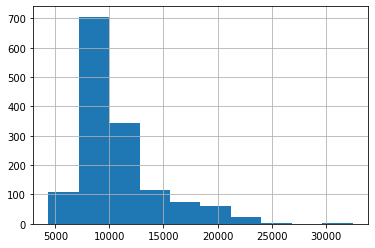

In [11]:
# Creating Bar chart as the Target variable is Continuous
df['Price'].hist()

In [12]:
df['Price'].describe()

count     1435.000000
mean     10720.915679
std       3608.732978
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64


Visualize distribution of all the Continuous Predictors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4f6d06b90>,
      dtype=object)

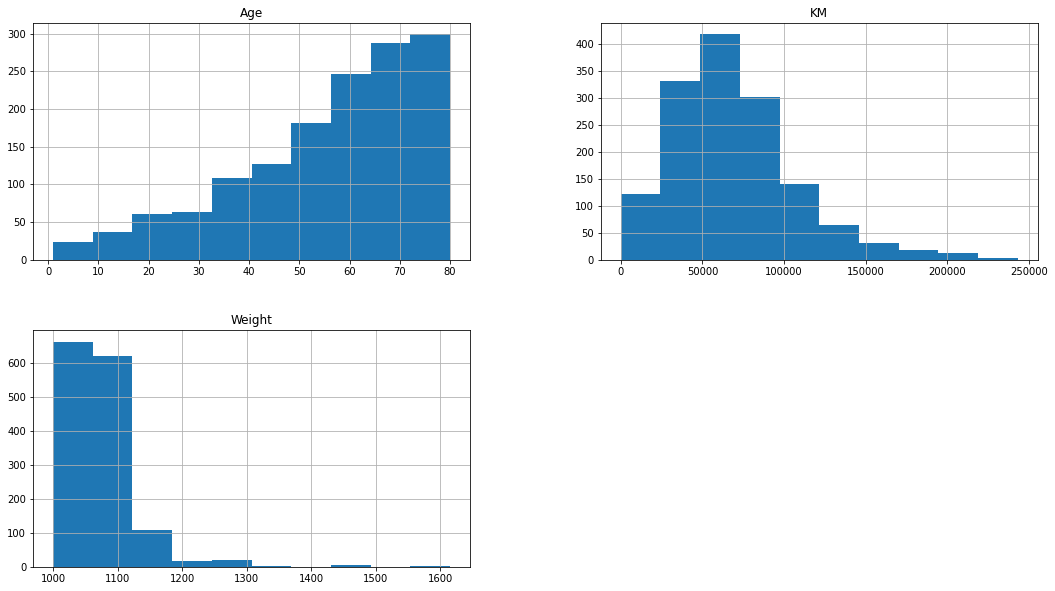

In [13]:
# Plotting histograms of multiple columns together

df.hist([ 'Age', 'KM', 'Weight' ], figsize=(18,10))

Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. in Weight The distribution is good but Outliers are seen beyond 1400, need to treat them.

Visualize distribution of all the Categorical Predictor variables

In [14]:
# Plotting multiple bar charts at once for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

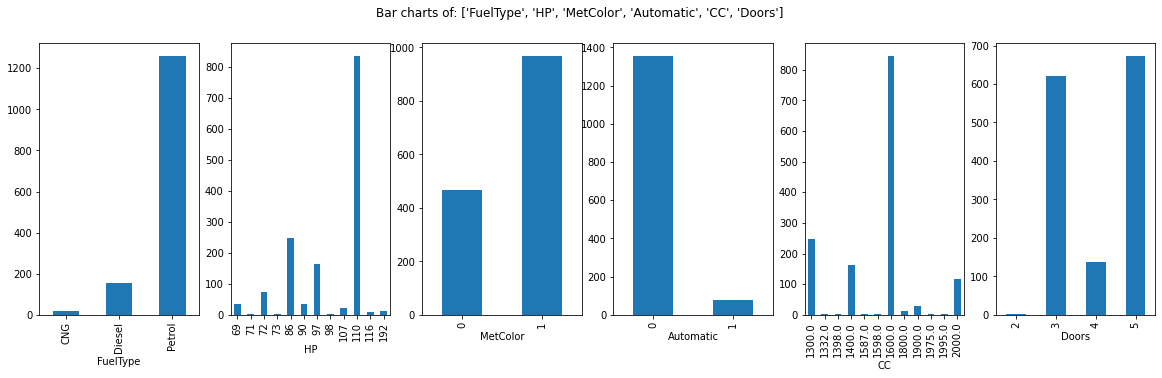

In [15]:
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['FuelType', 'HP', 'MetColor',  'Automatic', 'CC', 'Doors'])

Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

Outlier treatment

In [16]:
# Treating outliers for 'Weight' column

# Finding logical value near 1400
df['Weight'][df['Weight']<1400].sort_values(ascending=False)

138     1320.0
112     1320.0
115     1280.0
68      1275.0
119     1275.0
         ...  
690     1000.0
1410    1000.0
957     1000.0
927     1000.0
1000    1000.0
Name: Weight, Length: 1428, dtype: float64

In [17]:
# Replacing outliers with nearest logical value
df['Weight'][df['Weight']>1400]=1320

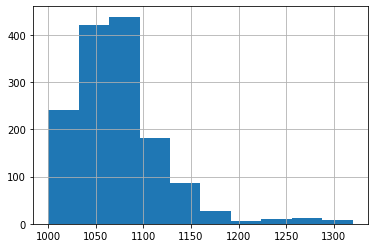

In [18]:
# Visualizing the distribution for weight again after outlier treatment
df['Weight'].hist()

The distribution has improved after the outlier treatment. There is still a tail on the right side, but it is thick, hence it is acceptable.

Missing values treatment

In [19]:
# Finding how many missing values are there for each column
df.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [20]:
# Treating missing values of categorical variable with MODE value
df['FuelType'].fillna(value=df['FuelType'].mode()[0], inplace=True)
df['CC'].fillna(value=df['CC'].mode()[0], inplace=True)

In [21]:
# Treating missing values of continuous variable with Median value
df['Weight'].fillna(value=df['Weight'].median(), inplace=True)
df['Age'].fillna(value=df['Age'].median(), inplace=True)

In [22]:
# Checking missing values again after the treatment
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

Feature Selection
Relationship exploration:Target variable Vs Continuous Variables
Visual Feature Selection

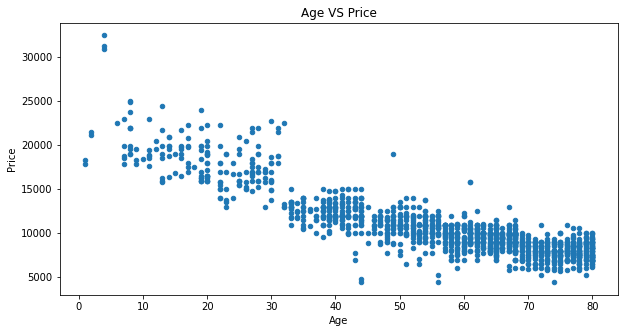

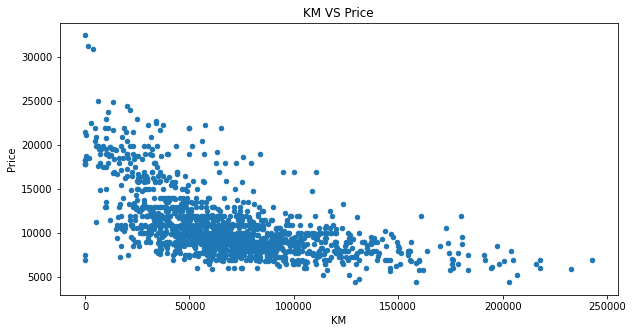

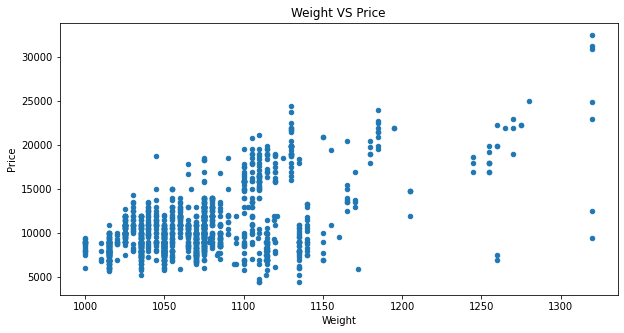

In [23]:
ContinuousCols=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

Statistical Feature Selection

In [24]:
# Calculating correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,Age,KM,Weight
Age,1.000000,0.502604,-0.488324
KM,0.502604,1.000000,-0.013607
Weight,-0.488324,-0.013607,1.000000


Final selected Continuous columns: 'Age','KM','Weight'
Relationship exploration: Categorical variable Vs Target variable
Visual Feature Selection

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

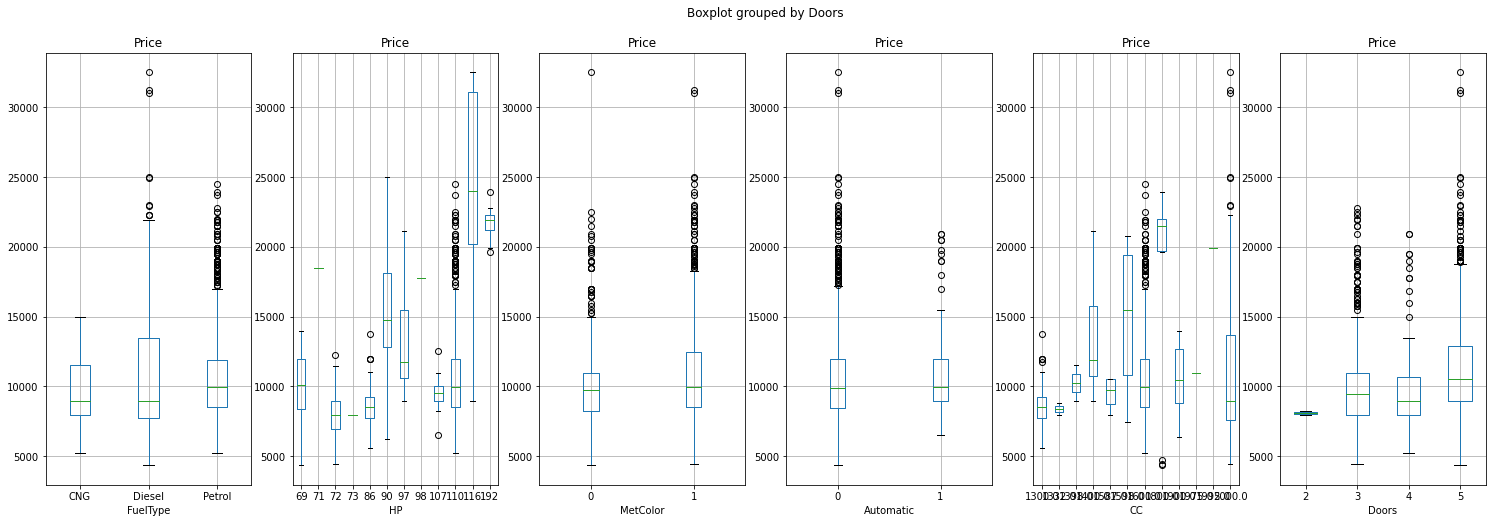

In [25]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(25,8))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Statistical Feature Selection using ANOVA test

In [26]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
   
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [27]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=df,    TargetVariable='Price',   CategoricalPredictorList=CategoricalPredictorList)

FuelType is NOT correlated with Price | P-Value: 0.07590511356326429
HP is correlated with Price | P-Value: 4.403061434008212e-109
MetColor is correlated with Price | P-Value: 4.4173957971674025e-05
Automatic is NOT correlated with Price | P-Value: 0.19897717506836016
CC is correlated with Price | P-Value: 2.566835080246702e-47
Doors is correlated with Price | P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

All categorical variables are correlated with the Target variable except "FuelType" and "Automatic".

Final selected Categorical columns: 'HP', 'MetColor', 'CC', 'Doors'

Selecting final predictors for Machine Learning

In [28]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [29]:
# Saving this final data for reference during deployment
DataForML.to_pickle('CarPriceDataForML.pkl')

In [30]:
# Treating all the nominal variables at once using dummy variables
CarPricesDataNumeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
CarPricesDataNumeric['Price']=df['Price']

# Printing sample rows
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


Splitting the Data into Training and Testing

In [31]:

# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

In [32]:
### Sandardization of data
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [33]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [34]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
51/51 [==============================] - 14s 1ms/step - loss: 1.0190
Epoch 2/50
51/51 [==============================] - 0s 1ms/step - loss: 0.9185
Epoch 3/50
51/51 [==============================] - 0s 1ms/step - loss: 0.8262
Epoch 4/50
51/51 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 5/50
51/51 [==============================] - 0s 1ms/step - loss: 0.2984
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2072
Epoch 7/50
51/51 [==============================] - 0s 1ms/step - loss: 0.2105
Epoch 8/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1888
Epoch 9/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 10/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1668
Epoch 11/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1487
Epoch 12/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1488
Epoch 13/50
51/51 [=============================

best Para

In [35]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial,Neuron_Trials,activation_function):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=Neuron_Trials, input_dim=7, kernel_initializer='normal', activation = activation_function))
    model.add(Dense(units=Neuron_Trials, kernel_initializer='normal', activation = activation_function))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [36]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30.40],'epochs':[10,20,50],
                  'Optimizer_trial':['adam', 'rmsprop'],'Neuron_Trials':[2,5,10],'activation_function': ['relu','sigmoid','tanh']}
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [37]:
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [38]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)
 
# Measuring how much time it took to find the best params
import time
StartTime=time.time()
 
# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)
 
EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/10
115/115 [==============================] - 1s 1ms/step - loss: 0.3496
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2421
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1751
Epoch 4/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1497
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1380
Epoch 6/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1150
Epoch 7/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 8/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1042
Epoch 9/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1017
Epoch 10/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0914
###################################################################### Accuracy: 19.102732386772274
Epoch 1/10
115/115 [==============================] - 1s 1ms/step - loss: 1.1668
Epoch 2/

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/data_adapter.py:306 slice_batch_indices  *
        first_k_indices = tf.slice(indices, [0], [num_in_full_batch])
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/array_ops.py:1107 slice
        return gen_array_ops._slice(input_, begin, size, name=name)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_array_ops.py:9411 _slice
        "Slice", input=input, begin=begin, size=size, name=name)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/op_def_library.py:531 _apply_op_helper
        repr(values), type(values

Streaming output truncated to the last 5000 lines.
Epoch 17/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1808
Epoch 18/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 19/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 20/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 21/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1486
Epoch 22/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 23/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 24/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 25/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 26/50
58/58 [==============================] - 0s 2ms/step - loss: 0.1394
Epoch 27/50
58/58 [==============================] - 0s 3ms/step - loss: 0.1532
Epoch 28/50
58/58 [==============================] - 0s 3ms/step - lo

In [39]:
grid_search.best_params_

{'Neuron_Trials': 2,
 'Optimizer_trial': 'rmsprop',
 'activation_function': 'relu',
 'batch_size': 20,
 'epochs': 20}

In [40]:
grid_search.best_score_

134.22587146422455

In [41]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=2, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='rmsprop')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 20, verbose=1)

Epoch 1/20
51/51 [==============================] - 1s 1ms/step - loss: 1.0738
Epoch 2/20
51/51 [==============================] - 0s 1ms/step - loss: 1.0694
Epoch 3/20
51/51 [==============================] - 0s 1ms/step - loss: 1.0613
Epoch 4/20
51/51 [==============================] - 0s 1ms/step - loss: 0.9136
Epoch 5/20
51/51 [==============================] - 0s 1ms/step - loss: 0.9615
Epoch 6/20
51/51 [==============================] - 0s 1ms/step - loss: 0.8157
Epoch 7/20
51/51 [==============================] - 0s 1ms/step - loss: 0.7443
Epoch 8/20
51/51 [==============================] - 0s 1ms/step - loss: 0.8010
Epoch 9/20
51/51 [==============================] - 0s 1ms/step - loss: 0.7883
Epoch 10/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6704
Epoch 11/20
51/51 [==============================] - 0s 979us/step - loss: 0.6104
Epoch 12/20
51/51 [==============================] - 0s 973us/step - loss: 0.6152
Epoch 13/20
51/51 [==========================

In [43]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,10081.548828
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10344.275391
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,9195.987305
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9586.043945
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,9153.455078


In [44]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))

The Accuracy of ANN model is: 88.16059486666114


Manual GridSearchCV

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:

            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,str(batch_size_trial)+'-'+str(epochs_trial),100-MAPE]]
                                                                    ,columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 41.65330523771572
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 37.29464004890285
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 57.00831059005685
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 65.81381821206135
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 37.57303174933552
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 35.10439768538211
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 48.21005621635507
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 57.63298670544654
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 35.94269985997788
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 32.66608224790838
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 61.70449425408489
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 66.61080543657577
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 30.69744426183516
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 61.825287624009896
15 Parameters: batc

In [ ]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 41.65823861116749
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 42.52056981099857
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 60.27051030715016
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 63.27152000154589
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 29.22954849297119
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 41.85253480811576
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 61.91274374180642
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 73.22140486182639
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 67.5653871616714
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 35.95045306299872
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 52.29711354138915
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 65.02334501934547
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 37.723334211466415
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 38.66693913593181
15 Parameters: batch

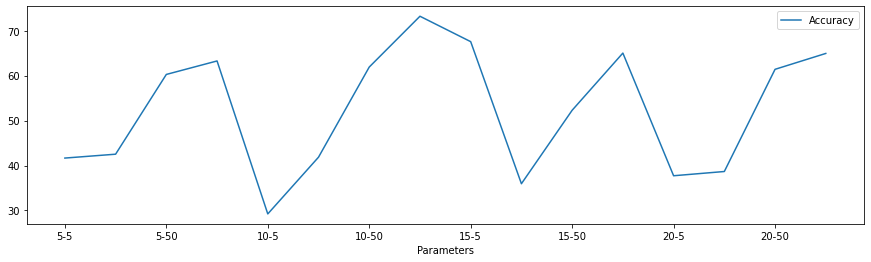

In [ ]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 100, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,10026.810547
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10064.216797
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8796.584961
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9388.279297
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8967.916992


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))

The Accuracy of ANN model is: 90.97931507605279
